In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import gmaps

%matplotlib inline


In [2]:
police_2016 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2016_.csv')
police_2016.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,20160000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,300.0,HERRON DR,311C,S,11.0,8125.0,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,20160000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,500.0,MAIN ST,213C,E,11.0,1113.0,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,20160000017,C,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,EDMONDSON PKE & MCMURRAY DR,835C,MT,33.0,8657.0,36.055,-86.743,"(36.055, -86.743)"
3,PD201600000004,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,500.0,S 5TH ST,NaN,E,11.0,1011.0,36.167,-86.762,"(36.167, -86.762)"
4,PD201600000005,01/01/2016 12:00:00 AM,20160000005,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,1100.0,BELL RD,333C,S,25.0,8721.0,36.046,-86.666,"(36.046, -86.666)"


In [3]:
police_2016.shape

(1127959, 19)

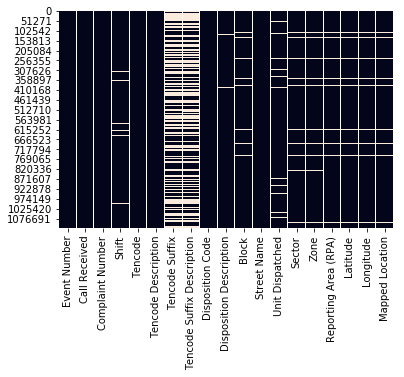

In [4]:
sns.heatmap(police_2016.isnull(), cbar=False)

In [5]:
reduced_police_2016=police_2016[["Event Number","Call Received","Shift","Tencode","Tencode Description","Disposition Code","Disposition Description","Unit Dispatched","Sector","Latitude","Longitude"]]
reduced_police_2016.head()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude
0,PD201600000001,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,36.133,-86.752
1,PD201600000002,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,213C,E,36.173,-86.764
2,PD201600000003,01/01/2016 12:00:00 AM,C,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,835C,MT,36.055,-86.743
3,PD201600000004,01/01/2016 12:00:00 AM,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,NaN,E,36.167,-86.762
4,PD201600000005,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,333C,S,36.046,-86.666


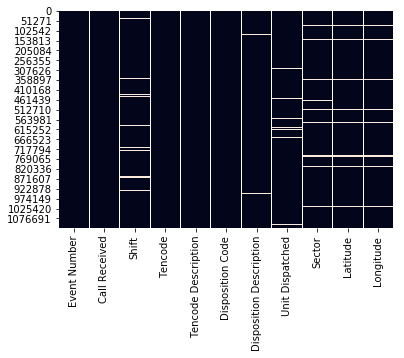

In [6]:
sns.heatmap(reduced_police_2016.isnull(), cbar=False)

In [7]:
new_police_2016=reduced_police_2016.dropna(how='any')
new_police_2016

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude
0,PD201600000001,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,36.133,-86.752
1,PD201600000002,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,213C,E,36.173,-86.764
2,PD201600000003,01/01/2016 12:00:00 AM,C,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,835C,MT,36.055,-86.743
4,PD201600000005,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,333C,S,36.046,-86.666
5,PD201600000006,01/01/2016 12:00:00 AM,C,46,Vehicle Accident - Personal Injury,11,DISREGARD / SIGNAL 9,333C,S,36.054,-86.619
7,PD201600000008,01/01/2016 12:02:00 AM,C,83,Shots Fired,5,GONE ON ARRIVAL,613C,N,36.179,-86.818
11,PD201600000012,01/01/2016 12:02:00 AM,C,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,213C,E,36.166,-86.760
12,PD201600000013,01/01/2016 12:02:00 AM,C,93,Traffic Violation,9,SUBJECT WARNED,721C,M,36.267,-86.746
13,PD201600000015,01/01/2016 12:03:00 AM,C,83,Shots Fired,10,NO RESPONSE,330C,S,36.072,-86.603
14,PD201600000016,01/01/2016 12:03:00 AM,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,711C,M,36.235,-86.766


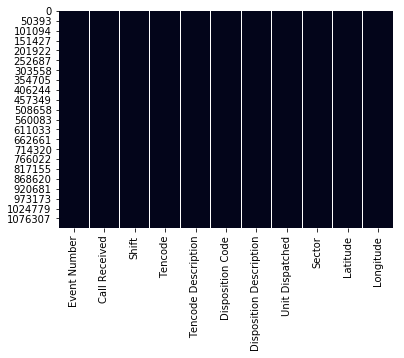

In [8]:
sns.heatmap(new_police_2016.isnull(), cbar=False)

In [9]:
new_police_2016.shape

(973598, 11)

In [10]:
new_police_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973598 entries, 0 to 1127854
Data columns (total 11 columns):
Event Number               973598 non-null object
Call Received              973598 non-null object
Shift                      973598 non-null object
Tencode                    973598 non-null object
Tencode Description        973598 non-null object
Disposition Code           973598 non-null int64
Disposition Description    973598 non-null object
Unit Dispatched            973598 non-null object
Sector                     973598 non-null object
Latitude                   973598 non-null float64
Longitude                  973598 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 89.1+ MB


In [11]:
new_police_2016["Tencode Description"].value_counts()

Traffic Violation                              258687
Business Check                                 199648
Want Officer for Investigation / Assistance    151452
Community Policing Activity                     49418
Administrative/Special Assignment               46920
Vehicle Accident - Property Damage              35800
Suspicious Person                               34210
Disorderly Person                               31161
Safety Hazard                                   30759
Burglary - Residence                            21730
Burglary - Non-Residence                        19410
Theft                                           13088
Investigate 911 Hang-Up Call                    12144
Vehicle Accident - Personal Injury               9993
Vehicle Blocking Right of Way                    9704
Meal Break                                       7834
Fight / Assault                                  6365
Fixed Post                                       4494
Shots Fired                 

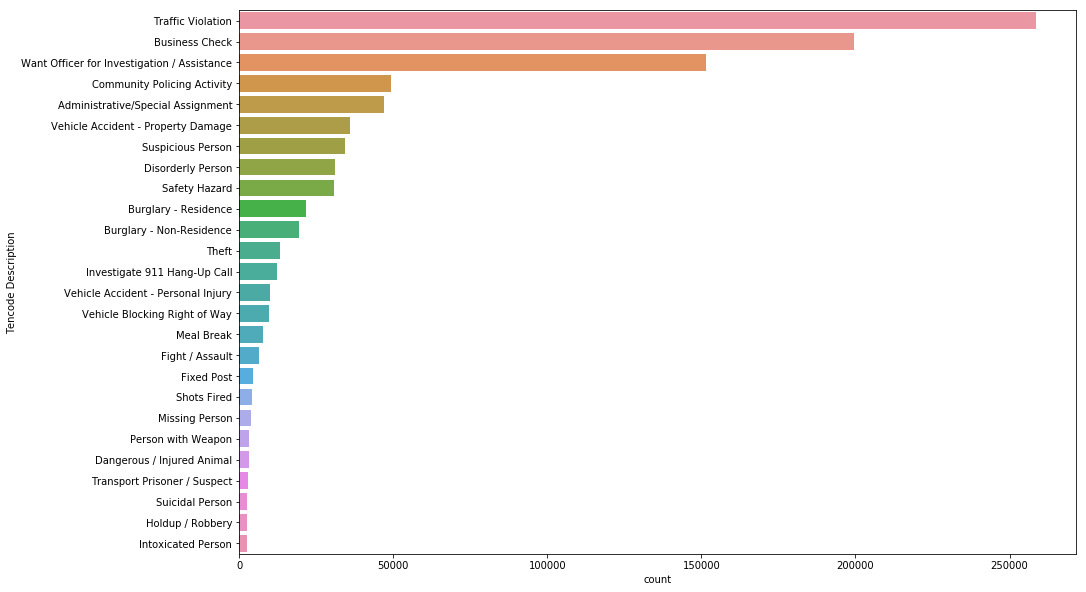

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Tencode Description', data =new_police_2016, order =new_police_2016['Tencode Description'].value_counts().iloc[:26].index)

In [40]:
not_real_crime=new_police_2016[
    (new_police_2016["Tencode Description"]=="Traffic Violation") |
    (new_police_2016["Tencode Description"]=="Business Check")|
    (new_police_2016["Tencode Description"]=="Want Officer for Investigation / Assistance")|
    (new_police_2016["Tencode Description"]=="Community Policing Activity")|
    (new_police_2016["Tencode Description"]=="Administrative/Special Assignment")|
    (new_police_2016["Tencode Description"]=="Vehicle Accident - Property Damage")|
    (new_police_2016["Tencode Description"]=="Vehicle Accident - Personal Injury")|
    (new_police_2016["Tencode Description"]=="Vehicle Blocking Right of Way")|
    (new_police_2016["Tencode Description"]=="Fixed Post")|
     (new_police_2016["Tencode Description"]=="Business Check")|
    (new_police_2016["Tencode Description"]=="Dangerous / Injured Animal")|
    (new_police_2016["Tencode Description"]=="Meal Break")]
not_real_crime["Tencode Description"].value_counts()


Traffic Violation                              258687
Business Check                                 199648
Want Officer for Investigation / Assistance    151452
Community Policing Activity                     49418
Administrative/Special Assignment               46920
Vehicle Accident - Property Damage              35800
Vehicle Accident - Personal Injury               9993
Vehicle Blocking Right of Way                    9704
Meal Break                                       7834
Fixed Post                                       4494
Dangerous / Injured Animal                       3031
Name: Tencode Description, dtype: int64

In [23]:
real_crime=new_police_2016[
    (new_police_2016["Tencode Description"]=="Suspicious Person") |
    (new_police_2016["Tencode Description"]=="Safety Hazard")|
    (new_police_2016["Tencode Description"]=="Burglary - Residence")|
    (new_police_2016["Tencode Description"]=="Burglary - Non-Residence")|
    (new_police_2016["Tencode Description"]=="Investigate 911 Hang-Up Call")|
    (new_police_2016["Tencode Description"]=="Theft")|
    (new_police_2016["Tencode Description"]=="Fight / Assault")|
    (new_police_2016["Tencode Description"]=="Shots Fired")|
    (new_police_2016["Tencode Description"]=="Missing Person")|
    (new_police_2016["Tencode Description"]=="Person with Weapon")|
    (new_police_2016["Tencode Description"]=="Transport Prisoner / Suspect")|
    (new_police_2016["Tencode Description"]=="Intoxicated Person")|
    (new_police_2016["Tencode Description"]=="Suicidal Person")|
    (new_police_2016["Tencode Description"]=="Holdup / Robbery")|
    (new_police_2016["Tencode Description"]=="Corpse / D. O. A.")|
    (new_police_2016["Tencode Description"]=="Mentally ILL Person")|
    (new_police_2016["Tencode Description"]=="Personal Relief")|
    (new_police_2016["Tencode Description"]=="Escort / Convoy")|
    (new_police_2016["Tencode Description"]=="Prowler")|
    (new_police_2016["Tencode Description"]=="Person Screaming")|
    (new_police_2016["Tencode Description"]=="Fire")|
    (new_police_2016["Tencode Description"]=="Shooting")|
    (new_police_2016["Tencode Description"]=="Hazardous Liquid / Gas Leak")|
    (new_police_2016["Tencode Description"]=="Kidnapping")|
    (new_police_2016["Tencode Description"]=="Cutting / Stabbing")|
    (new_police_2016["Tencode Description"]=="Bank Robbery")|
    (new_police_2016["Tencode Description"]=="Explosion")|
    (new_police_2016["Tencode Description"]=="Gang Activity")|
    (new_police_2016["Tencode Description"]=="Bomb Threat")|
    (new_police_2016["Tencode Description"]=="Prisoner Escapee")|
    (new_police_2016["Tencode Description"]=="Drowning")|
    (new_police_2016["Tencode Description"]=="Barricaded Suspect")
]
real_crime["Tencode Description"].value_counts()

Suspicious Person               34210
Safety Hazard                   30759
Burglary - Residence            21730
Burglary - Non-Residence        19410
Theft                           13088
Investigate 911 Hang-Up Call    12144
Meal Break                       7834
Fight / Assault                  6365
Shots Fired                      4167
Missing Person                   3919
Person with Weapon               3077
Transport Prisoner / Suspect     2937
Suicidal Person                  2656
Intoxicated Person               2639
Holdup / Robbery                 2639
Corpse / D. O. A.                 911
Mentally ILL Person               664
Personal Relief                   520
Escort / Convoy                   512
Prowler                           487
Person Screaming                  451
Fire                              406
Shooting                          237
Hazardous Liquid / Gas Leak       228
Kidnapping                        145
Cutting / Stabbing                145
Bank Robbery

In [38]:
important_crime=pd.DataFrame(real_crime)

In [24]:
# Create a new columns for Year, Day and Month, Hour
time_crime_2016=pd.DataFrame(real_crime)
time_crime_2016["Month"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[0]
time_crime_2016["Day"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[1]
time_crime_2016["Year"] = time_crime_2016["Call Received"].str.slice(6,11)
time_crime_2016["Time"] = time_crime_2016["Call Received"].str.slice(11,24) 




#crime_data_All_DF["Hour"] = crime_data_All_DF["Time"].str.rstrip(':').str.split(':').str[0].astype(int) 
time_crime_2016.head()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Month,Day,Year,Time
7,PD201600000008,01/01/2016 12:02:00 AM,C,83,Shots Fired,5,GONE ON ARRIVAL,613C,N,36.179,-86.818,01,01,2016,12:02:00 AM
13,PD201600000015,01/01/2016 12:03:00 AM,C,83,Shots Fired,10,NO RESPONSE,330C,S,36.072,-86.603,01,01,2016,12:03:00 AM
14,PD201600000016,01/01/2016 12:03:00 AM,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,711C,M,36.235,-86.766,01,01,2016,12:03:00 AM
16,PD201600000019,01/01/2016 12:05:00 AM,C,83,Shots Fired,5,GONE ON ARRIVAL,625C,N,36.238,-86.808,01,01,2016,12:05:00 AM
17,PD201600000022,01/01/2016 12:05:00 AM,C,83,Shots Fired,6,ASSISTED OTHER UNIT,2F21,E,36.180,-86.772,01,01,2016,12:05:00 AM


In [25]:
def convert_to_24(time):
    if time[-2:] == "AM" and time[:2] == "12":
        return "00"+time[2:-2]
    elif time[-2:] == "AM":
        return time[:-2]
    elif time[-2:] == "PM" and time[:2] == "12":
        return time[:-2]
    else:
        return str(int(time[:2]) + 12) + time[2:8]

In [26]:
time_crime_2016['Time'] = time_crime_2016['Time'].apply(convert_to_24)

In [27]:
time_crime_2016["Hour"] = time_crime_2016["Time"].str.slice(0,2).astype(int)
time_crime_2016.tail()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Month,Day,Year,Time,Hour
1127837,PD201601315888,12/31/2016 10:45:00 PM,B,57,Fight / Assault,5,GONE ON ARRIVAL,810C,MT,36.149,-86.798,12,31,2016,22:45:00,22
1127841,PD201601315892,12/31/2016 10:48:00 PM,B,83,Shots Fired,11,DISREGARD / SIGNAL 9,621C,N,36.228,-86.796,12,31,2016,22:48:00,22
1127842,PD201601315893,12/31/2016 10:49:00 PM,B,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,331C,S,36.056,-86.715,12,31,2016,22:49:00,22
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,12,31,2016,22:51:00,22
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,12,31,2016,22:56:00,22


In [28]:
#bins = [0, 7, 12, 18, 23]
#group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
bins = [-1, 7, 12, 18, 23]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening']


time_crime_2016["Hour Bin"] = pd.cut(time_crime_2016["Hour"], bins, labels=group_names)
time_crime_2016.tail(2)

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Month,Day,Year,Time,Hour,Hour Bin
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,12,31,2016,22:51:00,22,Evening
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,12,31,2016,22:56:00,22,Evening


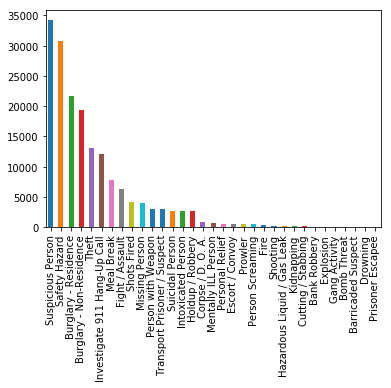

In [29]:

#Bar chart of tencode descriptions
fig, ax = plt.subplots()
time_crime_2016['Tencode Description'].value_counts().plot(ax=ax, kind='bar')


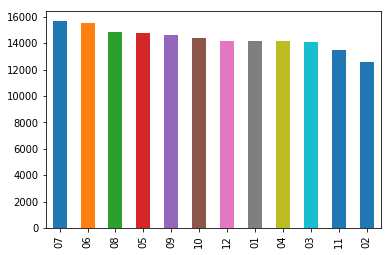

In [30]:
#Bar graph of months by number of calls
fig, ax = plt.subplots()
time_crime_2016['Month'].value_counts().plot(ax=ax, kind='bar')

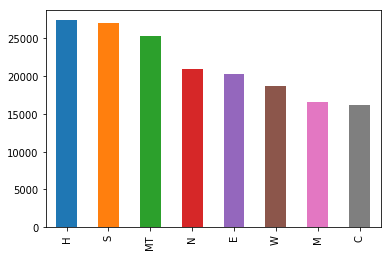

In [31]:
#Bar graph of calls per Sector of the City
fig, ax = plt.subplots()
time_crime_2016['Sector'].value_counts().plot(ax=ax, kind='bar')

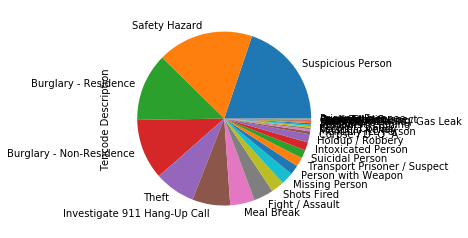

In [32]:
#Pie chart of Tencode descriptions
time_crime_2016['Tencode Description'].value_counts().plot(kind='pie')

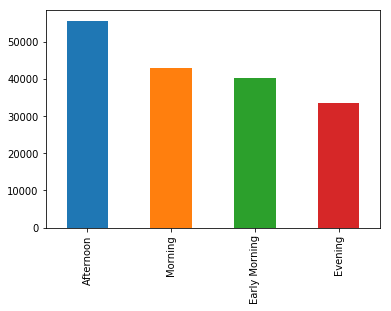

In [33]:
#Bar chart of hour bins
fig, ax = plt.subplots()
time_crime_2016['Hour Bin'].value_counts().plot(ax=ax, kind='bar')

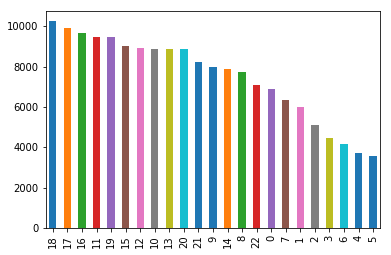

In [34]:
#Bar chart of calls byhour 
fig, ax = plt.subplots()
time_crime_2016['Hour'].value_counts().plot(ax=ax, kind='bar')

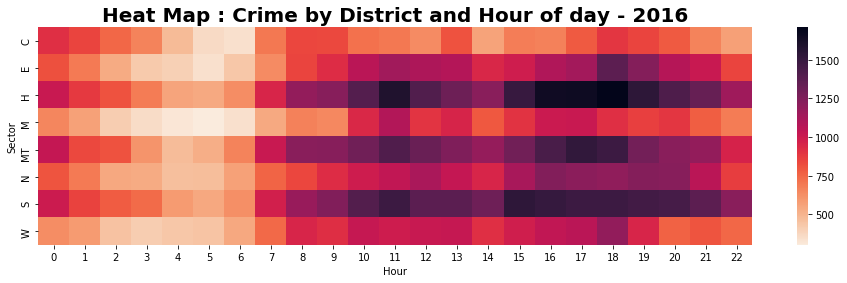

In [35]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Sector', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode Description"}, inplace=True)
df_h = df_gb_2016.pivot("Sector", "Hour", "Tencode Description")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by District and Hour of day - 2016', fontsize=20, weight='bold')
plt.savefig ("heatmap_sector_2016.png")
plt.show()

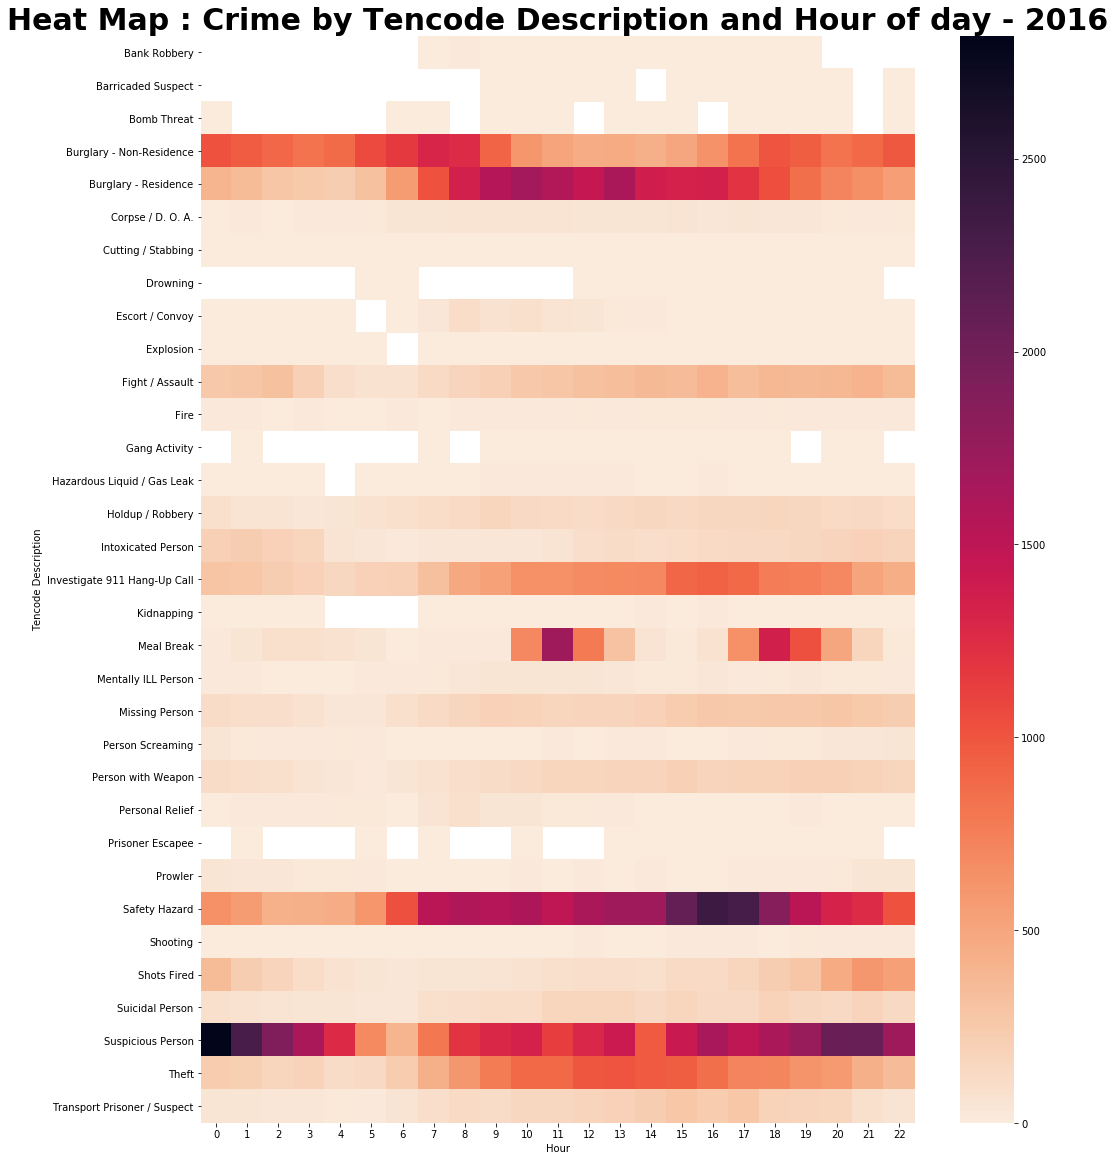

In [36]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Hour", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Hour of day - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_time_2016.png")
plt.show(5)

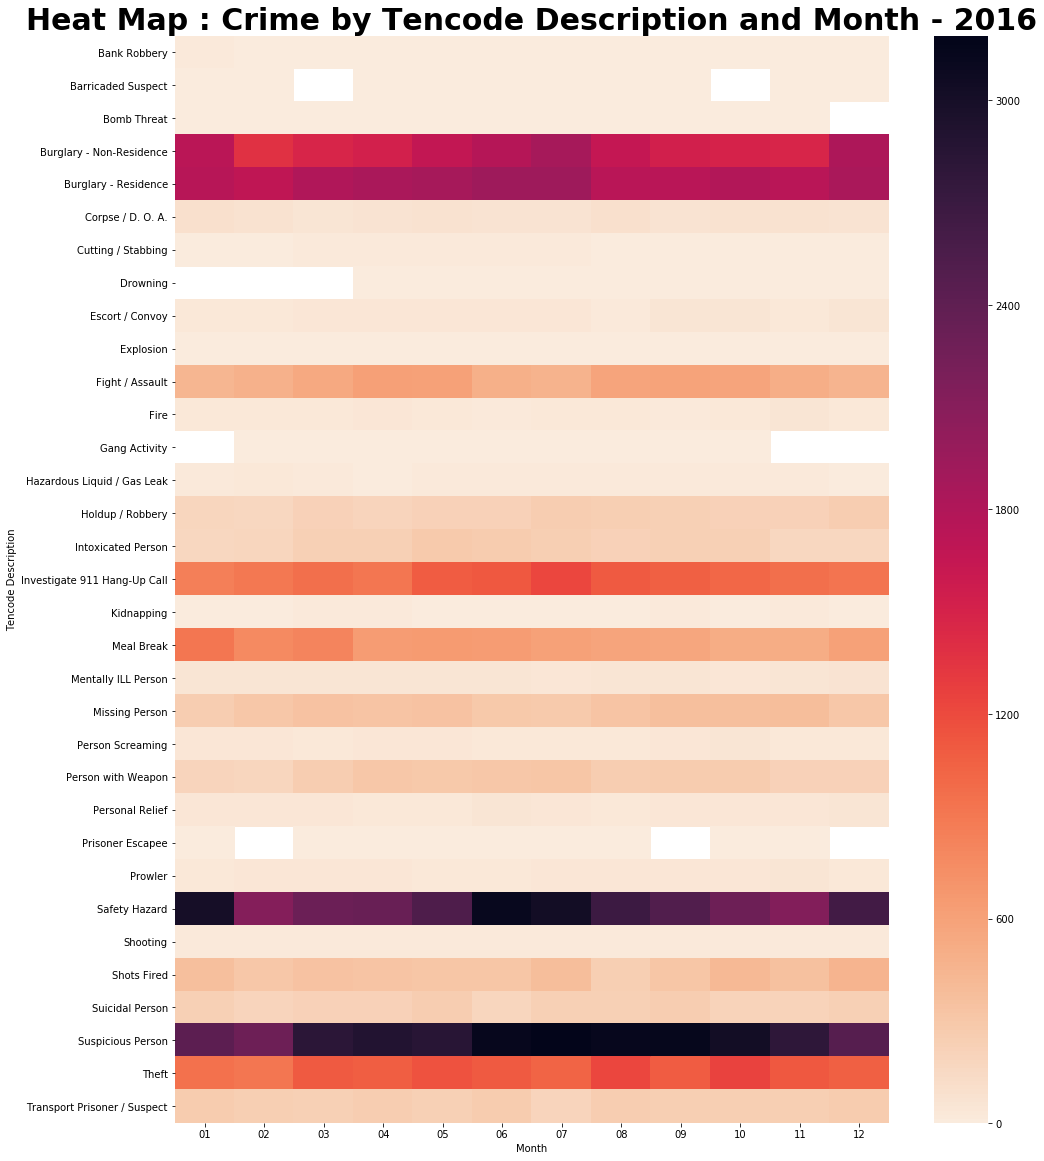

In [37]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Month']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Month", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Month - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_month_2016.png")
plt.show(5)